<a href="https://colab.research.google.com/github/Satvikmatta18/Firefly/blob/main/lazard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json


KeyboardInterrupt: 

In [ ]:
# Make a Kaggle directory and move the kaggle.json file
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Change the permissions of the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json



mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d locationscloudsdata/target-store-location-data-usa
!kaggle datasets download -d timmofeyy/-walmart-stores-location
!kaggle datasets download -d muonneutrino/us-census-demographic-data


Dataset URL: https://www.kaggle.com/datasets/locationscloudsdata/target-store-location-data-usa
License(s): CC0-1.0
  0% 0.00/179k [00:00<?, ?B/s]
100% 179k/179k [00:00<00:00, 63.9MB/s]
Dataset URL: https://www.kaggle.com/datasets/timmofeyy/-walmart-stores-location
License(s): CC0-1.0
  0% 0.00/253k [00:00<?, ?B/s]
100% 253k/253k [00:00<00:00, 62.5MB/s]
Dataset URL: https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data
License(s): CC0-1.0
 57% 6.00M/10.6M [00:00<00:00, 62.6MB/s]
100% 10.6M/10.6M [00:00<00:00, 86.1MB/s]


In [ ]:
import zipfile

# Unzip Target store data
with zipfile.ZipFile('target-store-location-data-usa.zip', 'r') as zip_ref:
    zip_ref.extractall('target_data')

# Unzip Walmart store data
with zipfile.ZipFile('-walmart-stores-location.zip', 'r') as zip_ref:
    zip_ref.extractall('walmart_data')

# Unzip US Census data
with zipfile.ZipFile('/content/us-census-demographic-data.zip', 'r') as zip_ref:
    zip_ref.extractall('census_data')

import pandas as pd

# Load Target store data
target_data = pd.read_csv('/content/target-store-location-data-usa.zip', encoding='ISO-8859-1')

# Load Walmart store data
walmart_data = pd.read_csv('/content/-walmart-stores-location.zip', encoding='ISO-8859-1')

# Load the 2015 county-level census data
census_2015_county_data = pd.read_csv('census_data/acs2015_county_data.csv')

# Load the 2017 county-level census data (optional)
census_2017_county_data = pd.read_csv('census_data/acs2017_county_data.csv')

# Check columns for each dataset to ensure correct loading
print("Target Data Columns:", target_data.columns)
print("Walmart Data Columns:", walmart_data.columns)
print("Census 2015 Data Columns:", census_2015_county_data.columns)
# Function to classify areas based on population size
def classify_region(population):
    if population > 500000:
        return 'Urban'
    elif 100000 <= population <= 500000:
        return 'Suburban'
    else:
        return 'Rural'

# Apply this function to classify regions in the census data
census_2015_county_data['AreaType'] = census_2015_county_data['TotalPop'].apply(classify_region)

# Verify the classification is applied
print(census_2015_county_data[['County', 'TotalPop', 'AreaType']].head())
# Dictionary mapping full state names to their abbreviations
state_abbreviation_map = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}




Target Data Columns: Index(['X.locale', 'Address.AddressLine1', 'Address.AddressLine2',
       'Address.City', 'Address.CountryName', 'Address.County',
       'Address.FormattedAddress', 'Address.IntersectionDescription',
       'Address.Latitude', 'Address.Longitude', 'Address.PostalCode',
       'Address.Subdivision', 'AlternateIdentifier.ID', 'ID',
       'IsDaylightSavingsTimeRecognized', 'LocationMilestones.LastRemodelDate',
       'LocationMilestones.OpenDate', 'Market', 'Name',
       'OperatingHours..timeFormat', 'Store.StoreDistrictID',
       'Store.StoreGroupID', 'Store.StoreRegionID', 'SubTypeDescription',
       'TimeZone.TimeZoneCode', 'TimeZone.TimeZoneDescription',
       'TimeZone.TimeZoneOffset.OffsetCode',
       'TimeZone.TimeZoneOffset.OffsetHours', 'TypeCode', 'PhoneNumber',
       'FaxNumber', 'BeginTime.MF', 'Is24Hours.MF', 'IsOpen.MF', 'Summary.MF',
       'ThruTime.MF', 'BeginTime.Sat', 'Is24Hours.Sat', 'IsOpen.Sat',
       'Summary.Sat', 'ThruTime.Sat', 'Begi

In [ ]:
# Convert full state names to abbreviations in the census data
census_2015_county_data['State'] = census_2015_county_data['State'].map(state_abbreviation_map)

# Check if the mapping worked
print(census_2015_county_data[['State', 'County', 'TotalPop', 'AreaType']].head())
# Merge Target locations with Census 2015 data based on state
target_with_population = target_data.merge(census_2015_county_data, left_on='Address.Subdivision', right_on='State', how='left')

# Merge Walmart locations with Census 2015 data based on state
walmart_with_population = walmart_data.merge(census_2015_county_data, left_on='state', right_on='State', how='left')

# Check if the merge worked correctly and 'TotalPop' and 'AreaType' are no longer NaN
print(target_with_population[['Address.City', 'Address.Subdivision', 'TotalPop', 'AreaType']].head())
print(walmart_with_population[['city', 'state', 'TotalPop', 'AreaType']].head())

  State   County  TotalPop  AreaType
0    AL  Autauga     55221     Rural
1    AL  Baldwin    195121  Suburban
2    AL  Barbour     26932     Rural
3    AL     Bibb     22604     Rural
4    AL   Blount     57710     Rural
  Address.City Address.Subdivision  TotalPop  AreaType
0   Tuscaloosa                  AL   55221.0     Rural
1   Tuscaloosa                  AL  195121.0  Suburban
2   Tuscaloosa                  AL   26932.0     Rural
3   Tuscaloosa                  AL   22604.0     Rural
4   Tuscaloosa                  AL   57710.0     Rural
     city state  TotalPop  AreaType
0  Conway    AR   18731.0     Rural
1  Conway    AR   21229.0     Rural
2  Conway    AR   41040.0     Rural
3  Conway    AR  238198.0  Suburban
4  Conway    AR   37227.0     Rural


In [ ]:
# Merge Target locations with Census 2015 data based on state
target_with_population = target_data.merge(census_2015_county_data, left_on='Address.Subdivision', right_on='State', how='left')

# Merge Walmart locations with Census 2015 data based on state
walmart_with_population = walmart_data.merge(census_2015_county_data, left_on='state', right_on='State', how='left')

# Check if the merge worked correctly and 'TotalPop' and 'AreaType' are no longer NaN
print(target_with_population[['Address.City', 'Address.Subdivision', 'TotalPop', 'AreaType']].head())
print(walmart_with_population[['city', 'state', 'TotalPop', 'AreaType']].head())


  Address.City Address.Subdivision  TotalPop  AreaType
0   Tuscaloosa                  AL   55221.0     Rural
1   Tuscaloosa                  AL  195121.0  Suburban
2   Tuscaloosa                  AL   26932.0     Rural
3   Tuscaloosa                  AL   22604.0     Rural
4   Tuscaloosa                  AL   57710.0     Rural
     city state  TotalPop  AreaType
0  Conway    AR   18731.0     Rural
1  Conway    AR   21229.0     Rural
2  Conway    AR   41040.0     Rural
3  Conway    AR  238198.0  Suburban
4  Conway    AR   37227.0     Rural


In [ ]:
# Analyze the distribution of Target and Walmart stores by AreaType
target_area_distribution = target_with_population['AreaType'].value_counts()
walmart_area_distribution = walmart_with_population['AreaType'].value_counts()

# Display the distribution
print("Target store distribution by area type:")
print(target_area_distribution)

print("\nWalmart store distribution by area type:")
print(walmart_area_distribution)


Target store distribution by area type:
AreaType
Rural       108641
Suburban     27542
Urban        11944
Name: count, dtype: int64

Walmart store distribution by area type:
AreaType
Rural       347937
Suburban     69360
Urban        22918
Name: count, dtype: int64


In [ ]:
!pip install yfinance


In [ ]:
# Check unique area types in Target and Walmart data
print("Unique Area Types in Target Data:")
print(target_with_population['AreaType'].unique())

print("\nUnique Area Types in Walmart Data:")
print(walmart_with_population['AreaType'].unique())
# Check for duplicate rows in Target and Walmart data
print("Number of duplicate rows in Target data:", target_with_population.duplicated().sum())
print("Number of duplicate rows in Walmart data:", walmart_with_population.duplicated().sum())
# Remove duplicates if any exist
target_with_population = target_with_population.drop_duplicates(subset=['Address.Latitude', 'Address.Longitude'])
walmart_with_population = walmart_with_population.drop_duplicates(subset=['latitude', 'longitude'])
# Count the total number of stores in each dataset
print("Total number of Target stores:", target_with_population.shape[0])
print("Total number of Walmart stores:", walmart_with_population.shape[0])


Unique Area Types in Target Data:
['Rural' 'Suburban' 'Urban' nan]

Unique Area Types in Walmart Data:
['Rural' 'Suburban' 'Urban' nan]
Number of duplicate rows in Target data: 0
Number of duplicate rows in Walmart data: 0
Total number of Target stores: 1780
Total number of Walmart stores: 4653


In [ ]:
# Count the number of stores by AreaType for both Target and Walmart
target_area_distribution = target_with_population['AreaType'].value_counts()
walmart_area_distribution = walmart_with_population['AreaType'].value_counts()

# Check the results
print("Target Store Count by Area Type:\n", target_area_distribution)
print("\nWalmart Store Count by Area Type:\n", walmart_area_distribution)


Target Store Count by Area Type:
 AreaType
Rural       989
Suburban    475
Urban       315
Name: count, dtype: int64

Walmart Store Count by Area Type:
 AreaType
Rural       3246
Suburban    1026
Urban        360
Name: count, dtype: int64


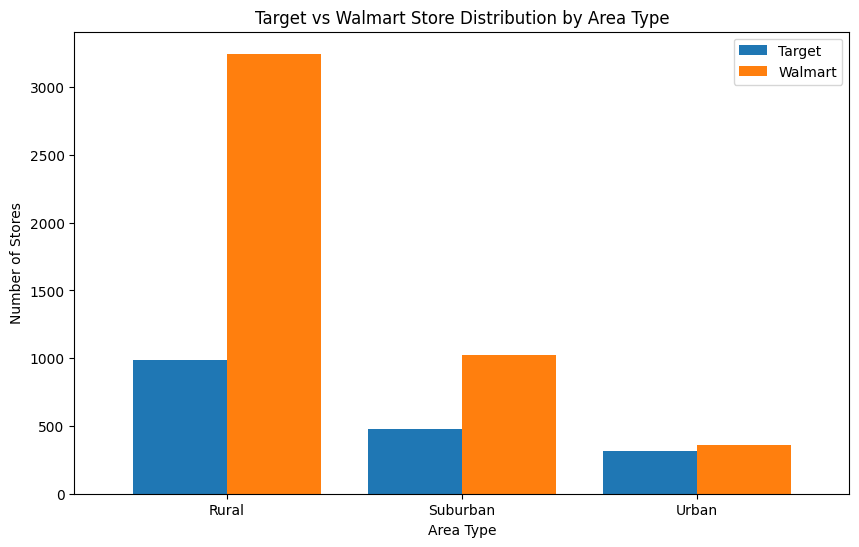

In [ ]:
import matplotlib.pyplot as plt

# Combine the area distribution data into a DataFrame
area_distribution_df = pd.DataFrame({
    'Target': target_area_distribution,
    'Walmart': walmart_area_distribution
}).fillna(0)

# Plot side-by-side bar charts
area_distribution_df.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Target vs Walmart Store Distribution by Area Type')
plt.ylabel('Number of Stores')
plt.xlabel('Area Type')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Calculate population per store in each area type
target_population_per_store = target_with_population.groupby('AreaType')['TotalPop'].sum() / target_area_distribution
walmart_population_per_store = walmart_with_population.groupby('AreaType')['TotalPop'].sum() / walmart_area_distribution

# Compare the population-to-store ratio
print("Target Population per Store by Area Type:\n", target_population_per_store)
print("\nWalmart Population per Store by Area Type:\n", walmart_population_per_store)


Target Population per Store by Area Type:
 AreaType
Rural       3.869162e+04
Suburban    2.456044e+05
Urban       1.515109e+06
dtype: float64

Walmart Population per Store by Area Type:
 AreaType
Rural       3.769793e+04
Suburban    2.383188e+05
Urban       1.409447e+06
dtype: float64


In [ ]:
# Count the number of stores in each county for Target and Walmart
target_store_count = target_with_population.groupby('County').size()
walmart_store_count = walmart_with_population.groupby('County').size()

# Display the store count per county
print("Target Store Count by County:\n", target_store_count)
print("\nWalmart Store Count by County:\n", walmart_store_count)


Target Store Count by County:
 County
Abbeville                  19
Acadia                     15
Accomack                   59
Ada                         6
Adair                      83
Adams                     399
Aitkin                     74
Alachua                   122
Alamance                   51
Alameda                   285
Albany                     81
Alcona                     53
Aleutians East Borough      3
Allegany                   39
Allen                      17
Anderson                  180
Androscoggin                5
Apache                     47
Appling                    12
Arkansas                    9
Atlantic                   46
Aurora                      5
Autauga                    11
Baker                      19
Barbour                     6
Barnstable                 43
Beaver                     13
Beaverhead                  7
Belknap                     9
Bernalillo                 10
Bristol                     4
Churchill                  17
Fa

In [ ]:
# Calculate population per store for each county (Target)
target_population_per_store = target_with_population.groupby('County').agg(
    population_per_store=('TotalPop', lambda x: x.mean() / len(x))
)

# Calculate population per store for each county (Walmart)
walmart_population_per_store = walmart_with_population.groupby('County').agg(
    population_per_store=('TotalPop', lambda x: x.mean() / len(x))
)

# Display the population per store data
print("Target Population per Store by County:\n", target_population_per_store)
print("\nWalmart Population per Store by County:\n", walmart_population_per_store)


Target Population per Store by County:
                         population_per_store
County                                      
Abbeville                        1315.631579
Acadia                           4144.200000
Accomack                          561.271186
Ada                             69583.500000
Adair                             235.409493
Adams                             238.362667
Aitkin                            214.040541
Alachua                          2083.754098
Alamance                         3044.274510
Alameda                          5561.343860
Albany                           3713.566072
Alcona                            199.056604
Aleutians East Borough           1101.333333
Allegany                         1885.871795
Allen                             769.470588
Anderson                          338.508179
Androscoggin                    21478.600000
Apache                           1534.553191
Appling                          1534.750000
Arkansas       

In [ ]:
# Filter counties where each store serves more than 50,000 people
target_under_served = target_population_per_store[target_population_per_store['population_per_store'] > 50000]
walmart_under_served = walmart_population_per_store[walmart_population_per_store['population_per_store'] > 50000]

# Display the under-served counties for both Target and Walmart
print("Under-served Counties for Target (Population per Store > 50,000):\n", target_under_served)
print("\nUnder-served Counties for Walmart (Population per Store > 50,000):\n", walmart_under_served)


Under-served Counties for Target (Population per Store > 50,000):
             population_per_store
County                          
Ada                      69583.5
Bernalillo               67394.3
Kent                     56503.0

Under-served Counties for Walmart (Population per Store > 50,000):
 Empty DataFrame
Columns: [population_per_store]
Index: []


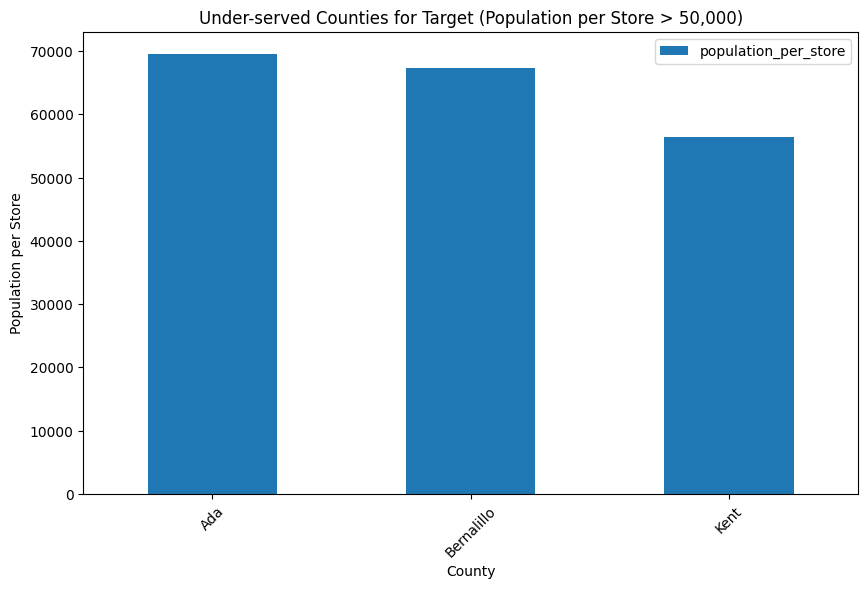

In [ ]:
import matplotlib.pyplot as plt

# Plot Target's under-served counties
target_under_served.plot(kind='bar', figsize=(10, 6))
plt.title('Under-served Counties for Target (Population per Store > 50,000)')
plt.ylabel('Population per Store')
plt.xlabel('County')
plt.xticks(rotation=45)
plt.show()


In [ ]:
!kaggle datasets download -d alejopaullier/usa-counties-coordinates


Dataset URL: https://www.kaggle.com/datasets/alejopaullier/usa-counties-coordinates
License(s): unknown
  0% 0.00/61.4k [00:00<?, ?B/s]
100% 61.4k/61.4k [00:00<00:00, 36.4MB/s]


In [ ]:
!ls usa_counties


ls: cannot access 'usa_counties': No such file or directory


In [ ]:
import pandas as pd

# Load the correct CSV file
county_coordinates = pd.read_csv('usa_counties/cfips_location.csv')

# Display the first few rows to verify the data
print(county_coordinates.head())


FileNotFoundError: [Errno 2] No such file or directory: 'usa_counties/cfips_location.csv'

In [ ]:
!pip install streamlit plotly pandas geopandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
import plotly.express as px

# Rename latitude and longitude columns for consistency (if needed)
target_with_population.rename(columns={'Address.Latitude': 'lat', 'Address.Longitude': 'lon'}, inplace=True)
walmart_with_population.rename(columns={'latitude': 'lat', 'longitude': 'lon'}, inplace=True)

# Add a column to distinguish between Target and Walmart
target_with_population['StoreType'] = 'Target'
walmart_with_population['StoreType'] = 'Walmart'

# Create the Target map
fig_target = px.scatter_geo(target_with_population,
                             lat='lat',
                             lon='lon',
                             title='Locations of Target Stores in the USA',
                             hover_name='StoreType',
                             scope='usa',
                             labels={'StoreType': 'Store Type'})

# Show the Target map
fig_target.show()

# Create the Walmart map
fig_walmart = px.scatter_geo(walmart_with_population,
                             lat='lat',
                             lon='lon',
                             title='Locations of Walmart Stores in the USA',
                             hover_name='StoreType',
                             scope='usa',
                             labels={'StoreType': 'Store Type'})

# Show the Walmart map
fig_walmart.show()


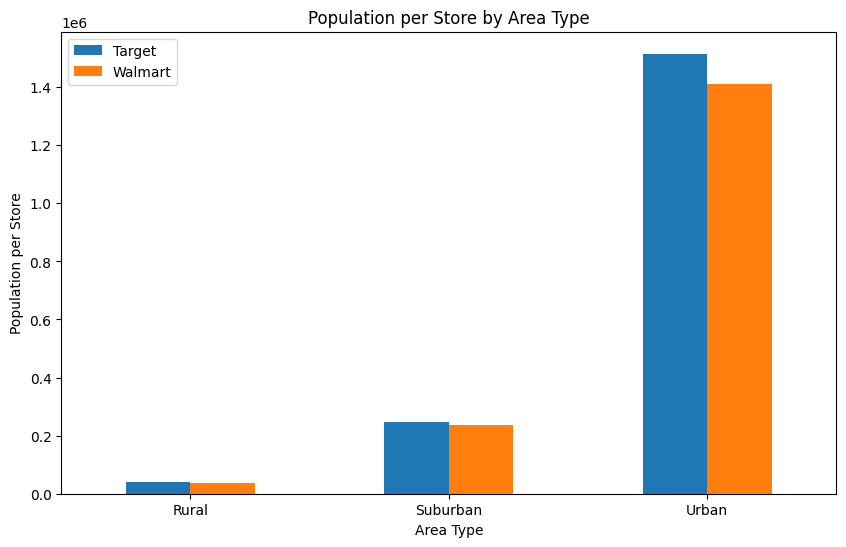

In [ ]:
# Calculate population per store in each area type
target_population_per_store = target_with_population.groupby('AreaType')['TotalPop'].sum() / target_area_distribution
walmart_population_per_store = walmart_with_population.groupby('AreaType')['TotalPop'].sum() / walmart_area_distribution

# Create a DataFrame to compare
population_per_store_df = pd.DataFrame({
    'Target': target_population_per_store,
    'Walmart': walmart_population_per_store
})

# Plot bar chart
population_per_store_df.plot(kind='bar', figsize=(10, 6))
plt.title('Population per Store by Area Type')
plt.ylabel('Population per Store')
plt.xlabel('Area Type')
plt.xticks(rotation=0)
plt.show()


Under-Served Counties for Target (Population per Store > 50,000):
          County  population_per_store
316         Kent              56503.00
551          Ada              69583.50
1219     Bristol             138190.75
1271        Kent             207530.00
1795  Bernalillo              67394.30
2312        Kent              54986.00
Under-Served Counties for Walmart (Population per Store > 50,000):
       County  population_per_store
1219  Bristol          61418.111111
1271     Kent          69176.666667


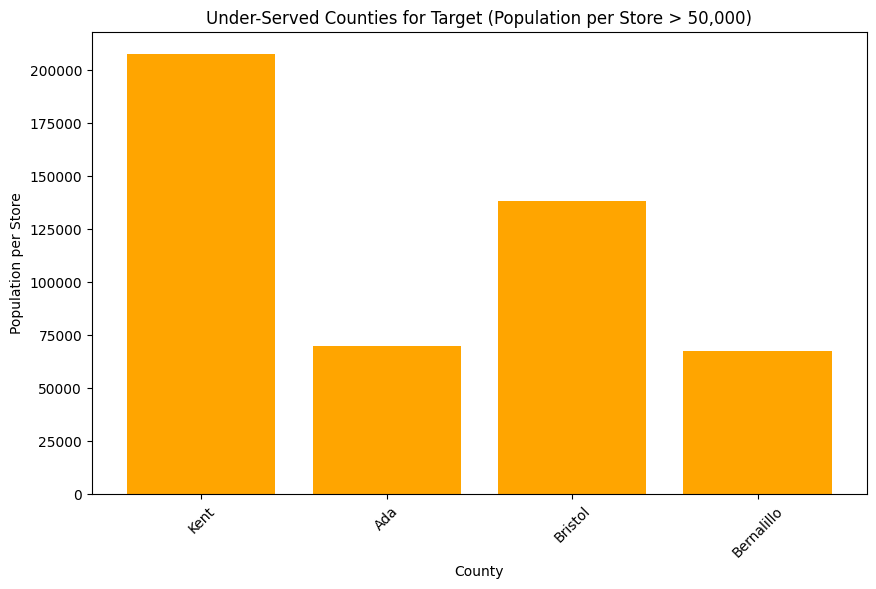

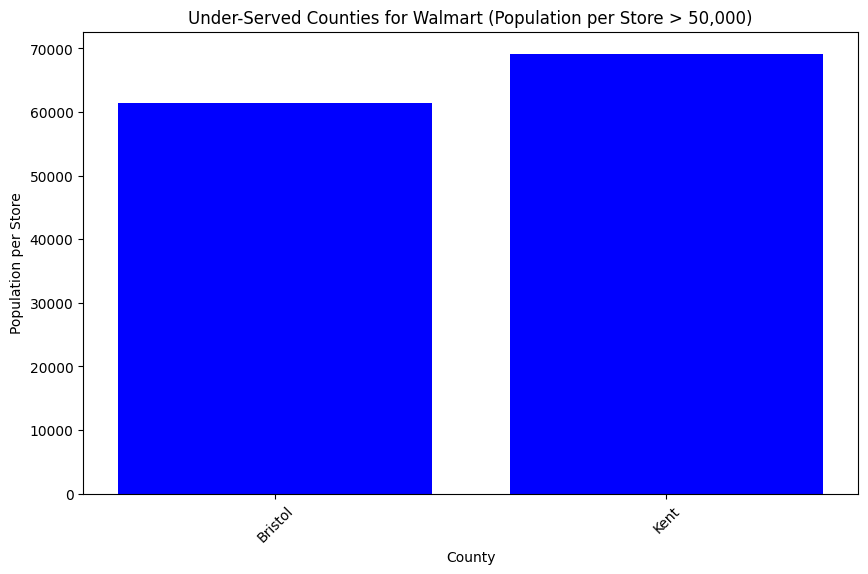

In [ ]:
# Group the data by 'County' to calculate total population and count of stores per county
target_store_count = target_with_population.groupby('County').size().reset_index(name='TargetStoreCount')
walmart_store_count = walmart_with_population.groupby('County').size().reset_index(name='WalmartStoreCount')

# Merge the store count data with the census data
target_population_per_store = census_2015_county_data.merge(target_store_count, on='County', how='left')
walmart_population_per_store = census_2015_county_data.merge(walmart_store_count, on='County', how='left')

# Fill NaN values for counties without stores with 0
target_population_per_store['TargetStoreCount'] = target_population_per_store['TargetStoreCount'].fillna(0)
walmart_population_per_store['WalmartStoreCount'] = walmart_population_per_store['WalmartStoreCount'].fillna(0)

# Calculate population per store (avoid division by zero)
target_population_per_store['population_per_store'] = target_population_per_store['TotalPop'] / target_population_per_store['TargetStoreCount'].replace(0, float('inf'))
walmart_population_per_store['population_per_store'] = walmart_population_per_store['TotalPop'] / walmart_population_per_store['WalmartStoreCount'].replace(0, float('inf'))

# Filter counties where the population per store is greater than 50,000 people
target_under_served = target_population_per_store[target_population_per_store['population_per_store'] > 50000]
walmart_under_served = walmart_population_per_store[walmart_population_per_store['population_per_store'] > 50000]

# Display the under-served counties for Target
print("Under-Served Counties for Target (Population per Store > 50,000):")
print(target_under_served[['County', 'population_per_store']])

# Display the under-served counties for Walmart
print("Under-Served Counties for Walmart (Population per Store > 50,000):")
print(walmart_under_served[['County', 'population_per_store']])

# Plot the under-served counties for Target
plt.figure(figsize=(10, 6))
plt.bar(target_under_served['County'], target_under_served['population_per_store'], color='orange')
plt.title('Under-Served Counties for Target (Population per Store > 50,000)')
plt.ylabel('Population per Store')
plt.xlabel('County')
plt.xticks(rotation=45)
plt.show()

# Plot the under-served counties for Walmart
plt.figure(figsize=(10, 6))
plt.bar(walmart_under_served['County'], walmart_under_served['population_per_store'], color='blue')
plt.title('Under-Served Counties for Walmart (Population per Store > 50,000)')
plt.ylabel('Population per Store')
plt.xlabel('County')
plt.xticks(rotation=45)
plt.show()


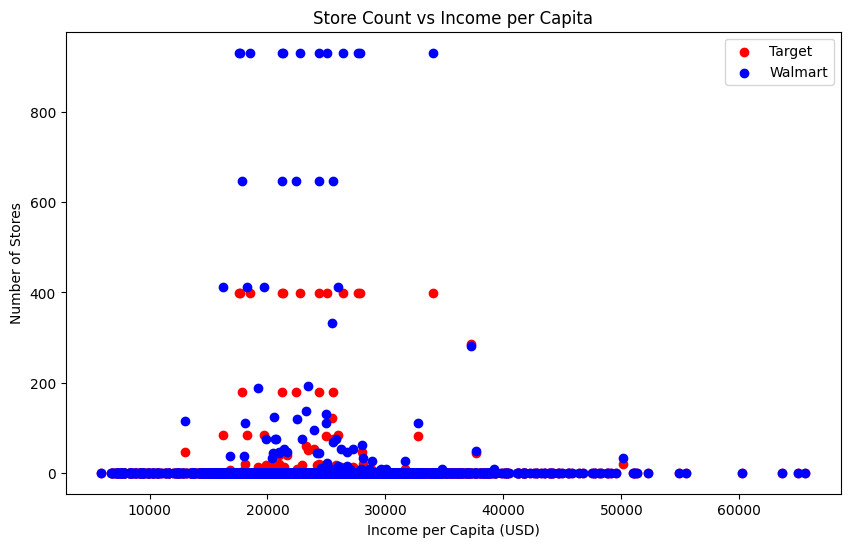

In [ ]:
# Scatter plot: Median Income vs Number of Stores for Target and Walmart
plt.figure(figsize=(10, 6))
plt.scatter(target_population_per_store['IncomePerCap'], target_population_per_store['TargetStoreCount'], color='red', label='Target')
plt.scatter(walmart_population_per_store['IncomePerCap'], walmart_population_per_store['WalmartStoreCount'], color='blue', label='Walmart')
plt.title('Store Count vs Income per Capita')
plt.xlabel('Income per Capita (USD)')
plt.ylabel('Number of Stores')
plt.legend()
plt.show()


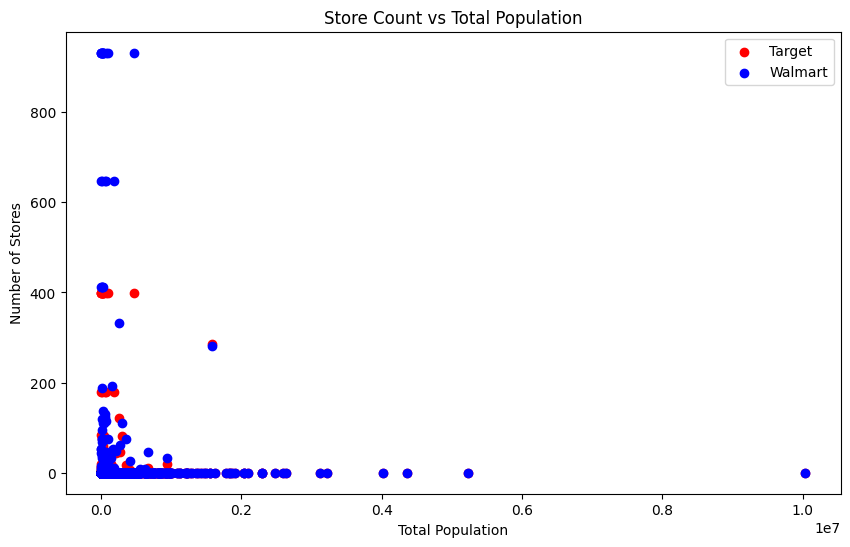

In [ ]:
# Scatter plot: Total Population vs Number of Stores for Target and Walmart
plt.figure(figsize=(10, 6))
plt.scatter(target_population_per_store['TotalPop'], target_population_per_store['TargetStoreCount'], color='red', label='Target')
plt.scatter(walmart_population_per_store['TotalPop'], walmart_population_per_store['WalmartStoreCount'], color='blue', label='Walmart')
plt.title('Store Count vs Total Population')
plt.xlabel('Total Population')
plt.ylabel('Number of Stores')
plt.legend()
plt.show()


<ipython-input-35-6ac4b6bbf525>:30: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-35-6ac4b6bbf525>:30: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-35-6ac4b6bbf525>:30: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



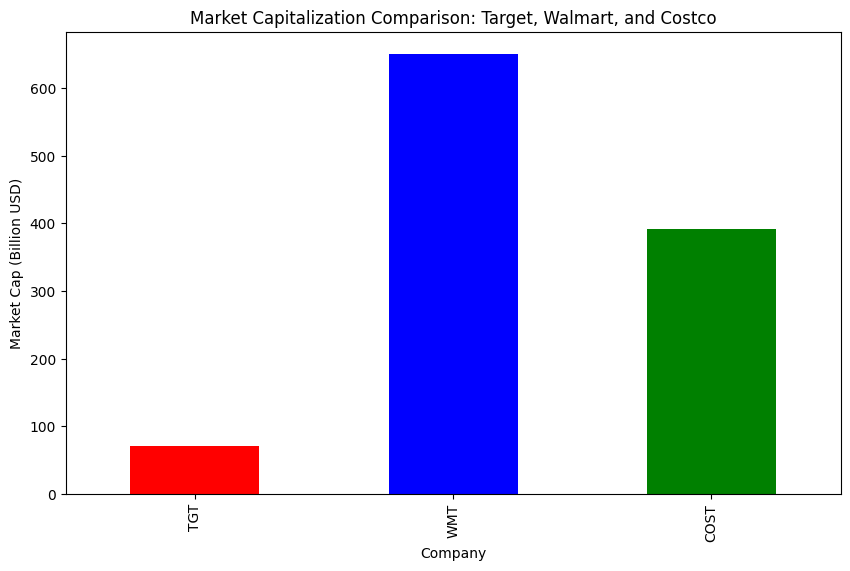

  Company  Market Cap (Billion $)  Stock Price (USD)
0     TGT               70.428000         152.880005
1     WMT              650.615980          80.940002
2    COST              391.329022         883.109985


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Get the stock tickers
tickers = ['TGT', 'WMT', 'COST']

# Download financial data
stock_data = yf.Tickers(tickers)

# Get stock price and market cap for each company (latest data)
market_cap_data = {
    'Company': [],
    'Market Cap (Billion $)': [],
    'Stock Price (USD)': []
}

# Loop through each ticker and get the necessary data
for ticker in tickers:
    company = stock_data.tickers[ticker]

    # Fetch market cap from the info dictionary
    try:
        market_cap = company.info['marketCap'] / 1e9  # Convert to billion USD
    except KeyError:
        market_cap = None  # Handle missing market cap

    # Fetch the latest stock price using the history method
    try:
        stock_price = company.history(period='1d')['Close'][-1]
    except (KeyError, IndexError):
        stock_price = None  # Handle missing stock price

    # Append data to the dictionary
    market_cap_data['Company'].append(ticker)
    market_cap_data['Market Cap (Billion $)'].append(market_cap)
    market_cap_data['Stock Price (USD)'].append(stock_price)

# Create DataFrame
market_cap_df = pd.DataFrame(market_cap_data)

# Plot bar chart of Market Capitalization
market_cap_df.set_index('Company')['Market Cap (Billion $)'].plot(kind='bar', figsize=(10, 6), color=['red', 'blue', 'green'])
plt.title('Market Capitalization Comparison: Target, Walmart, and Costco')
plt.ylabel('Market Cap (Billion USD)')
plt.show()

# Display DataFrame to review
print(market_cap_df)


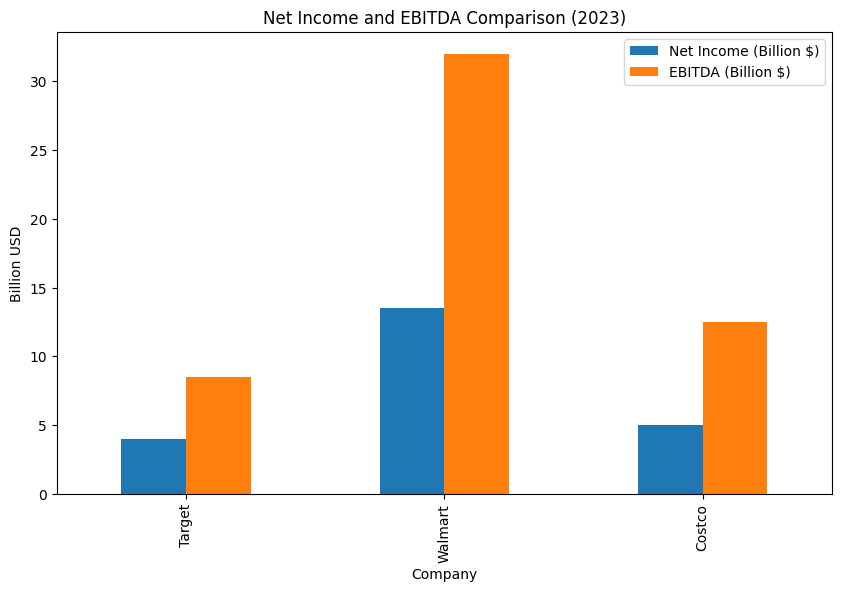

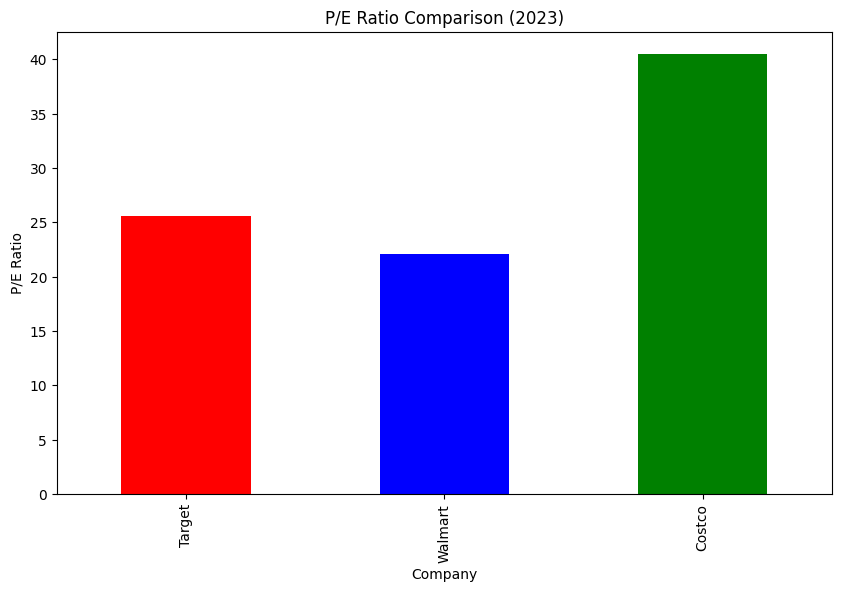

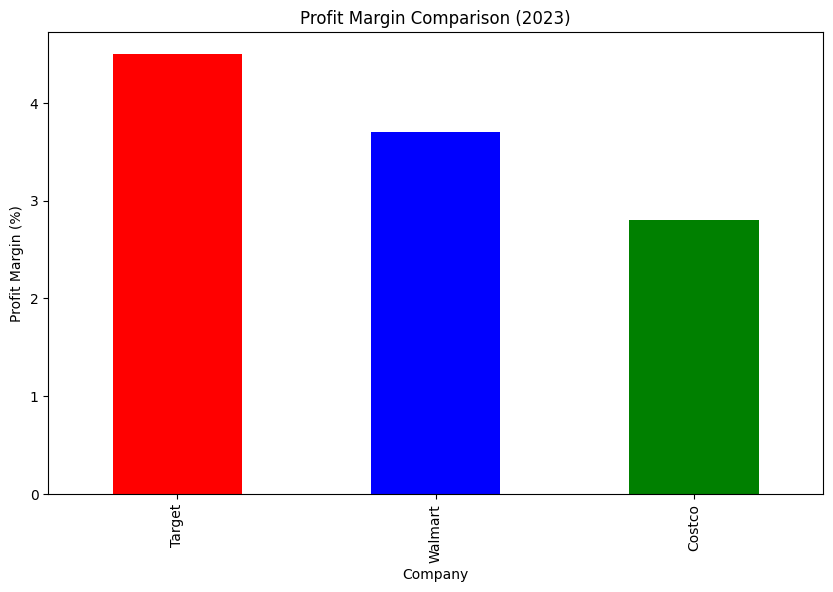

In [ ]:
# Create a DataFrame with financial metrics (this is a mock dataset; real data should come from financial reports)
financial_data = pd.DataFrame({
    'Company': ['Target', 'Walmart', 'Costco'],
    'Net Income (Billion $)': [4.0, 13.5, 5.0],  # Mock numbers
    'EBITDA (Billion $)': [8.5, 32.0, 12.5],
    'P/E Ratio': [25.6, 22.1, 40.5],
    'Profit Margin (%)': [4.5, 3.7, 2.8]
})

# Plot a bar chart comparing Net Income
financial_data.set_index('Company')[['Net Income (Billion $)', 'EBITDA (Billion $)']].plot(kind='bar', figsize=(10, 6))
plt.title('Net Income and EBITDA Comparison (2023)')
plt.ylabel('Billion USD')
plt.show()

# Plot P/E Ratio comparison
financial_data.set_index('Company')['P/E Ratio'].plot(kind='bar', figsize=(10, 6), color=['red', 'blue', 'green'])
plt.title('P/E Ratio Comparison (2023)')
plt.ylabel('P/E Ratio')
plt.show()

# Plot Profit Margin comparison
financial_data.set_index('Company')['Profit Margin (%)'].plot(kind='bar', figsize=(10, 6), color=['red', 'blue', 'green'])
plt.title('Profit Margin Comparison (2023)')
plt.ylabel('Profit Margin (%)')
plt.show()


<ipython-input-37-adad08b03c53>:30: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-37-adad08b03c53>:30: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-37-adad08b03c53>:30: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-37-adad08b03c53>:30: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

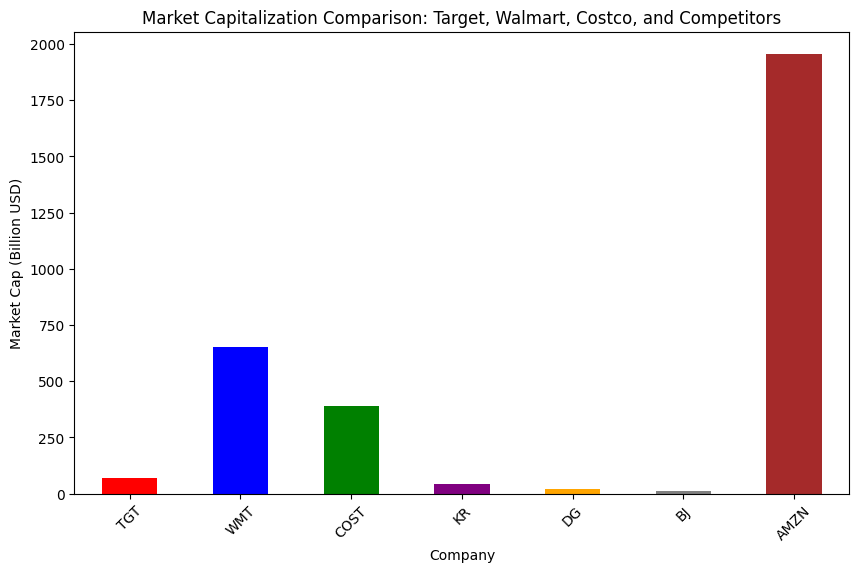

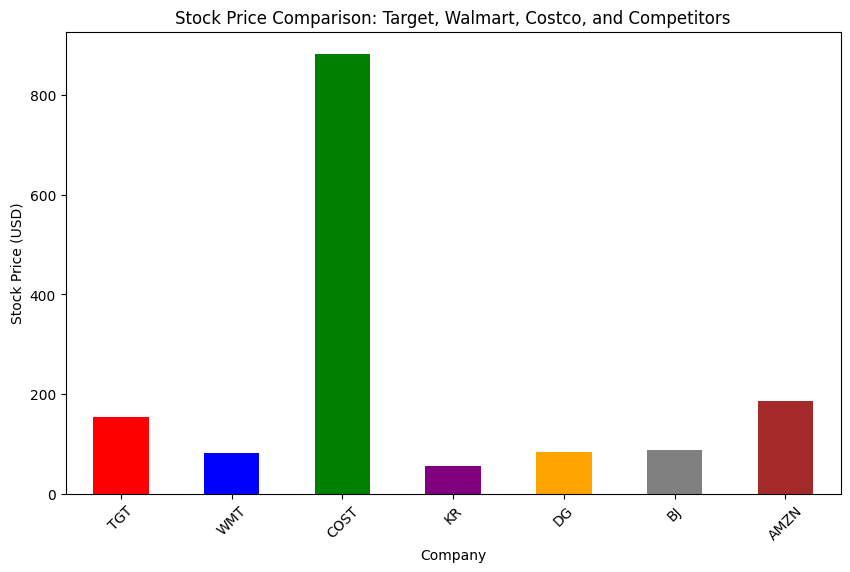

  Company  Market Cap (Billion $)  Stock Price (USD)
0     TGT               70.428000         152.880005
1     WMT              650.615980          80.940002
2    COST              391.329022         883.109985
3      KR               40.435634          55.889999
4      DG               18.549830          84.349998
5      BJ               11.468689          86.500000
6    AMZN             1957.534237         186.509995


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# List of major retail competitors
tickers = ['TGT', 'WMT', 'COST', 'KR', 'DG', 'BJ', 'AMZN']

# Download financial data
stock_data = yf.Tickers(tickers)

# Dictionary to hold financial data
market_cap_data = {
    'Company': [],
    'Market Cap (Billion $)': [],
    'Stock Price (USD)': []
}

# Loop through each ticker to get market cap and stock price
for ticker in tickers:
    company = stock_data.tickers[ticker]

    # Fetch market cap from the info dictionary
    try:
        market_cap = company.info['marketCap'] / 1e9  # Convert to billion USD
    except KeyError:
        market_cap = None  # Handle missing market cap

    # Fetch the latest stock price using the history method
    try:
        stock_price = company.history(period='1d')['Close'][-1]
    except (KeyError, IndexError):
        stock_price = None  # Handle missing stock price

    # Append the data to the dictionary
    market_cap_data['Company'].append(ticker)
    market_cap_data['Market Cap (Billion $)'].append(market_cap)
    market_cap_data['Stock Price (USD)'].append(stock_price)

# Create DataFrame for market cap and stock prices
market_cap_df = pd.DataFrame(market_cap_data)

# Plot bar chart of Market Capitalization
market_cap_df.set_index('Company')['Market Cap (Billion $)'].plot(kind='bar', figsize=(10, 6), color=['red', 'blue', 'green', 'purple', 'orange', 'gray', 'brown'])
plt.title('Market Capitalization Comparison: Target, Walmart, Costco, and Competitors')
plt.ylabel('Market Cap (Billion USD)')
plt.xlabel('Company')
plt.xticks(rotation=45)
plt.show()

# Plot bar chart of Stock Price
market_cap_df.set_index('Company')['Stock Price (USD)'].plot(kind='bar', figsize=(10, 6), color=['red', 'blue', 'green', 'purple', 'orange', 'gray', 'brown'])
plt.title('Stock Price Comparison: Target, Walmart, Costco, and Competitors')
plt.ylabel('Stock Price (USD)')
plt.xlabel('Company')
plt.xticks(rotation=45)
plt.show()

# Display the DataFrame for review
print(market_cap_df)


<ipython-input-38-e5f0de887a22>:39: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-38-e5f0de887a22>:39: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-38-e5f0de887a22>:39: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-38-e5f0de887a22>:39: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

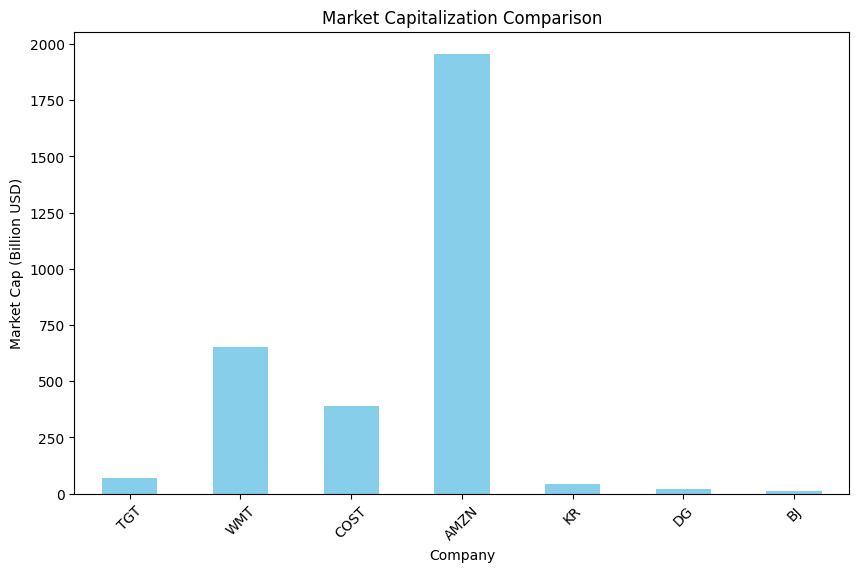

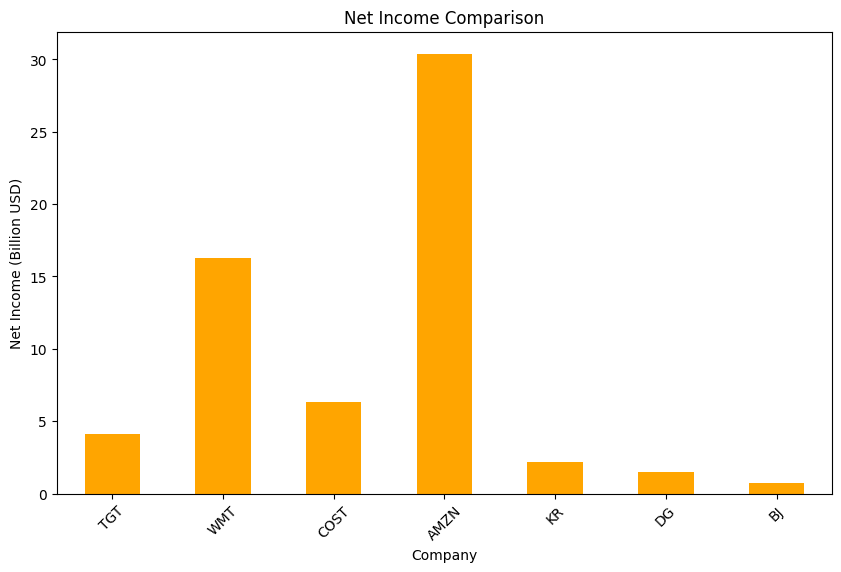

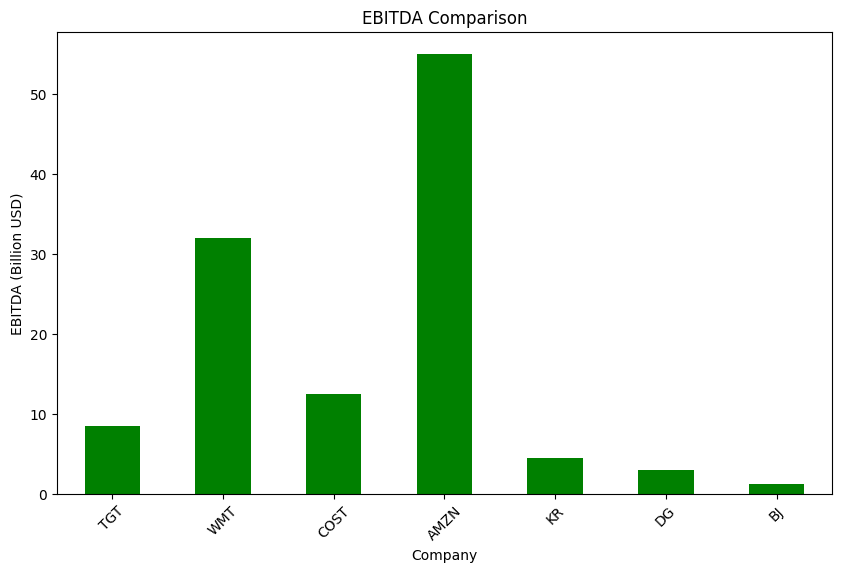

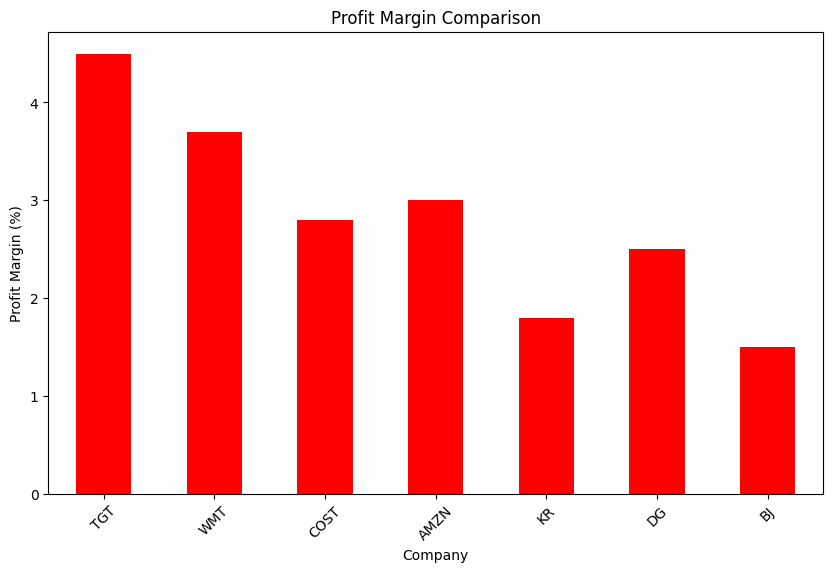

  Company  Market Cap (Billion $)  Stock Price (USD)  Net Income (Billion $)  \
0     TGT               70.428000         152.880005                     4.1   
1     WMT              650.615980          80.940002                    16.3   
2    COST              391.329022         883.109985                     6.3   
3    AMZN             1957.534237         186.509995                    30.4   
4      KR               40.435634          55.889999                     2.2   
5      DG               18.549830          84.349998                     1.5   
6      BJ               11.468689          86.500000                     0.7   

   EBITDA (Billion $)  Profit Margin (%)  
0                 8.5                4.5  
1                32.0                3.7  
2                12.5                2.8  
3                55.0                3.0  
4                 4.5                1.8  
5                 3.0                2.5  
6                 1.2                1.5  


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the list of tickers for the competitors
tickers = ['TGT', 'WMT', 'COST', 'AMZN', 'KR', 'DG', 'BJ']

# Download stock data using yfinance
stock_data = yf.Tickers(tickers)

# Create a dictionary to hold financial data
financial_data = {
    'Company': [],
    'Market Cap (Billion $)': [],
    'Stock Price (USD)': [],
    'Net Income (Billion $)': [],
    'EBITDA (Billion $)': [],
    'Profit Margin (%)': []
}

# Add manually obtained data for Net Income, EBITDA, and Profit Margin
manual_data = {
    'TGT': {'Net Income': 4.1, 'EBITDA': 8.5, 'Profit Margin': 4.5},
    'WMT': {'Net Income': 16.3, 'EBITDA': 32.0, 'Profit Margin': 3.7},
    'COST': {'Net Income': 6.3, 'EBITDA': 12.5, 'Profit Margin': 2.8},
    'AMZN': {'Net Income': 30.4, 'EBITDA': 55.0, 'Profit Margin': 3.0},
    'KR': {'Net Income': 2.2, 'EBITDA': 4.5, 'Profit Margin': 1.8},
    'DG': {'Net Income': 1.5, 'EBITDA': 3.0, 'Profit Margin': 2.5},
    'BJ': {'Net Income': 0.7, 'EBITDA': 1.2, 'Profit Margin': 1.5}
}

# Loop through each ticker and extract market cap and stock price
for ticker in tickers:
    company = stock_data.tickers[ticker]

    # Extract market cap and stock price
    try:
        market_cap = company.info['marketCap'] / 1e9  # Convert to billions
        stock_price = company.history(period='1d')['Close'][-1]  # Get latest stock price
    except KeyError:
        market_cap, stock_price = None, None

    # Append data to the dictionary
    financial_data['Company'].append(ticker)
    financial_data['Market Cap (Billion $)'].append(market_cap)
    financial_data['Stock Price (USD)'].append(stock_price)
    financial_data['Net Income (Billion $)'].append(manual_data[ticker]['Net Income'])
    financial_data['EBITDA (Billion $)'].append(manual_data[ticker]['EBITDA'])
    financial_data['Profit Margin (%)'].append(manual_data[ticker]['Profit Margin'])

# Create a DataFrame
financial_df = pd.DataFrame(financial_data)

# Plot Market Capitalization
financial_df.set_index('Company')['Market Cap (Billion $)'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Market Capitalization Comparison')
plt.ylabel('Market Cap (Billion USD)')
plt.xticks(rotation=45)
plt.show()

# Plot Net Income
financial_df.set_index('Company')['Net Income (Billion $)'].plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Net Income Comparison')
plt.ylabel('Net Income (Billion USD)')
plt.xticks(rotation=45)
plt.show()

# Plot EBITDA
financial_df.set_index('Company')['EBITDA (Billion $)'].plot(kind='bar', figsize=(10, 6), color='green')
plt.title('EBITDA Comparison')
plt.ylabel('EBITDA (Billion USD)')
plt.xticks(rotation=45)
plt.show()

# Plot Profit Margin
financial_df.set_index('Company')['Profit Margin (%)'].plot(kind='bar', figsize=(10, 6), color='red')
plt.title('Profit Margin Comparison')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.show()

# Display DataFrame to review
print(financial_df)


In [ ]:
!kaggle datasets download -d mikestokholm/costco-warehouse-information


Dataset URL: https://www.kaggle.com/datasets/mikestokholm/costco-warehouse-information
License(s): CC0-1.0
  0% 0.00/207k [00:00<?, ?B/s]
100% 207k/207k [00:00<00:00, 22.8MB/s]


In [ ]:
import zipfile

# Unzipping the downloaded file
with zipfile.ZipFile('costco-warehouse-information.zip', 'r') as zip_ref:
    zip_ref.extractall('costco_data')


In [ ]:
import pandas as pd

# Load the Costco JSON data into a Pandas DataFrame
costco_data = pd.read_json('/content/costco_data/costco_warehouses.json')

# Display the first few rows of the dataset
print(costco_data.head())


   stlocID  displayName  identifier           phone fax  \
0        1            1           1  (206) 622-3136       
1        2            2           2  (503) 252-2243       
2        6            6           6  (206) 575-9191       
3        8            8           8  (425) 827-1693       
4        9            9           9  (503) 644-7615       

                address1      city state country     zipCode  ...  \
0         4401 4TH AVE S   SEATTLE    WA      US  98134-2389  ...   
1      4849 NE 138TH AVE  PORTLAND    OR      US  97230-3401  ...   
2  400 COSTCO DR STE 150   TUKWILA    WA      US  98188-4808  ...   
3      8629 120TH AVE NE  KIRKLAND    WA      US  98033-5865  ...   
4    15901 SW JENKINS RD     ALOHA    OR      US  97006-5098  ...   

                                     tireCenterHours  \
0  [{'title': 'Mon-Fri.', 'code': 'open', 'time':...   
1  [{'title': 'Mon-Fri.', 'code': 'open', 'time':...   
2  [{'title': 'Mon-Fri.', 'code': 'open', 'time':...   
3  [{'

In [ ]:
!kaggle datasets download -d polartech/complete-store-locations-of-costco


Dataset URL: https://www.kaggle.com/datasets/polartech/complete-store-locations-of-costco
License(s): unknown
  0% 0.00/58.4k [00:00<?, ?B/s]
100% 58.4k/58.4k [00:00<00:00, 57.9MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('complete-store-locations-of-costco.zip', 'r') as zip_ref:
    zip_ref.extractall('costco_data')


In [ ]:
import pandas as pd

# Load the Costco dataset
costco_data = pd.read_csv('/content/costco_data/costco_store.csv')

# Check the first few rows of the dataset
print(costco_data.head())


     tid  loc_name  loc_number   loc_type               address_1 country  \
0  24350   Lincoln        1285  Warehouse     1620 PINE LAKE ROAD      US   
1  24351  La Vista        1237  Warehouse  12515 PORTSIDE PARKWAY      US   
2  24352     Omaha        1012  Warehouse        12300 W DODGE RD      US   
3  24353   Wichita        1200  Warehouse          9700 E KELLOGG      US   
4  24354    Lenexa         349  Warehouse        9350 MARSHALL DR      US   

  region_code                                 hours_of_operation state  \
0          MW  Mon-Fri:10:00:00-20:30:00; Sat:09:30:00-18:00:...    NE   
1          MW  Mon-Fri:10:00:00-20:30:00; Sat:09:30:00-18:00:...    NE   
2          MW  Mon-Fri:10:00:00-20:30:00; Sat:09:30:00-18:00:...    NE   
3          TE  Mon-Fri:10:00:00-20:30:00; Sat:09:30:00-18:00:...    KS   
4          MW  Mon-Fri:10:00:00-20:30:00; Sat:09:30:00-18:00:...    KS   

       city postal_code           phone   latitude  longitude  \
0   LINCOLN  68512-3612  (5

In [ ]:
import plotly.express as px

# Create the Costco store map using latitude and longitude from the dataset
fig_costco = px.scatter_geo(costco_data,
                            lat='latitude',
                            lon='longitude',
                            title='Costco Store Locations in the USA',
                            hover_name='loc_name',
                            scope='usa',
                            labels={'loc_name': 'Store Name'})

# Show the Costco map
fig_costco.show()


In [ ]:
!kaggle datasets download -d thedevastator/kroger-store-locations-available-for-research


Dataset URL: https://www.kaggle.com/datasets/thedevastator/kroger-store-locations-available-for-research
License(s): other
  0% 0.00/175k [00:00<?, ?B/s]
100% 175k/175k [00:00<00:00, 60.4MB/s]


In [ ]:
import pandas as pd

# Load the Kroger dataset
kroger_data = pd.read_csv('kroger_data/kroger_store.csv')

# Display the first few rows of the dataset
print(kroger_data.head())


   index    TID         loc_name loc_number loc_type    brand  \
0      0  10326  Christiana Mall      00835        J  JEWELRY   
1      1  10327        Long Neck      00336        C     HART   
2      2  10328          Bayside      00327        C     HART   
3      3  10329          Weirton      00803        C   KROGER   
4      4  10330  Hollywood Plaza      00512        C   KROGER   

                                       address          city state  \
0         502 Christiana Mall Newark, DE 19702        Newark    DE   
1        26370 Bay Farm Rd Millsboro, DE 19966     Millsboro    DE   
2    31221 Americana Pkwy Selbyville, DE 19975    Selbyville    DE   
3        100 Saint Thomas Dr Weirton, WV 26062       Weirton    WV   
4  264 S Hollywood Blvd Steubenville, OH 43952  Steubenville    OH   

        neighborhood  postal_code         phone   latitude  longitude  \
0  NEW CASTLE COUNTY        19702  3.023668e+09  39.678008 -75.652355   
1      SUSSEX COUNTY        19966  3.02945

In [ ]:
import plotly.express as px

# Create the Kroger store map using latitude and longitude from the dataset
fig_kroger = px.scatter_geo(kroger_data,
                            lat='latitude',
                            lon='longitude',
                            title='Kroger Store Locations in the USA',
                            hover_name='loc_name',
                            scope='usa',
                            labels={'loc_name': 'Store Name'})

# Show the Kroger map
fig_kroger.show()
